In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [11]:
%config InlineBackend.figure_format = 'svg'

In [12]:
data_0_0 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_0.0_c10_0.0_2022_1_27_15.csv', index_col=0)# 
data_1_1 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_1.0_c10_1.0_2022_1_27_15.csv', index_col=0)
data_2_2 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_2.0_c10_2.0_2022_1_27_15.csv', index_col=0)
data_3_3 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_3.0_c10_3.0_2022_1_27_15.csv', index_col=0)
data_4_4 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/flavio_tests/data/toy_data_c9_4.0_c10_4.0_2022_1_27_15.csv', index_col=0)

data_0_0['L'] = [0] * len(data_0_0)
data_1_1['L'] = [1] * len(data_1_1)
data_2_2['L'] = [2] * len(data_2_2)
data_3_3['L'] = [3] * len(data_3_3)
data_4_4['L'] = [4] * len(data_4_4)


In [15]:
data_base00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/toy_data_c9_0.0_c10_0.0_2022_1_31_15.csv')
big_data00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/ML_Demo/data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)
main_file_min3_3_50 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/mixed_data_2022_2_3_18.csv')
test_data_00 = pd.read_csv('/Users/jakubpazio/Imperial/Master Project/new-physics/new-physics/toy_data/data_generation/datasets/toy_data_c9_0.0_c10_0.0_2022_2_3_17.csv')

In [16]:
data_base00.drop(columns=['c10', 'BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)
main_file_min3_3_50.drop(columns=['c10','BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)
test_data_00.drop(columns=['c9','c10','BR_rnd','dBR_rnd','dBR','BR_interpolated'], inplace=True)

In [17]:
le = LabelEncoder()
le.fit(main_file_min3_3_50.c9)
main_file_min3_3_50.c9 = le.transform(main_file_min3_3_50.c9)
data_base00.c9 = le.transform(data_base00.c9)

In [15]:
log_likelihood_models = {}
for i, data in enumerate([data_1_1,data_2_2,data_3_3,data_4_4]):
    X = pd.concat([data_0_0,data])
    Y = X['L']
    X = X.drop(columns='L')
    mlp_clf = MLPClassifier()
    mlp_clf.fit(X, Y)

    log_likelihood = []
    for j in range(1000):
        sample = big_data00.sample(1000)
        log_probs = mlp_clf.predict_log_proba(sample)
        log_likelihood.append(sum(log_probs))
    
    log_likelihood_models[i] = np.array(log_likelihood)

/Users/jakubpazio/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


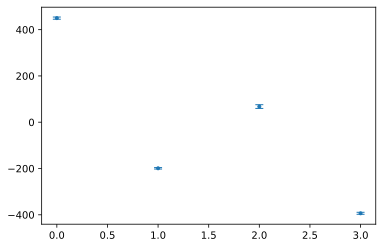

In [20]:
for k, arr in log_likelihood_models.items():
    mean_0 = arr[:, 0].mean()
    mean_1 = arr[:, 1].mean()
    std_0 = arr[:, 0].std()
    std_1 = arr[:, 1].std()

    plt.errorbar(k, mean_0-mean_1, marker='.', yerr=std_0,c='tab:blue', capsize=4)
    # plt.errorbar(k, mean_1, marker='.', yerr=std_1,c='tab:orange', capsize=4)
# plt.show()

In [ ]:
for i, data in enumerate([data_1_1,data_2_2,data_3_3,data_4_4]):
    X = pd.concat([data_0_0,data])
    Y = X['L']
    X = X.drop(columns='L')
    mlp_clf = MLPClassifier()
    mlp_clf.fit(X, Y)

    log_likelihood = []
    for j in range(1000):
        sample = big_data00.sample(1000)
        log_probs = mlp_clf.predict_log_proba(sample)
        log_likelihood.append(sum(log_probs))
    
    log_likelihood_models[i] = np.array(log_likelihood)

TODO
- make same size
- don't have q2 as index

In [24]:
log_likelihood_models = {}

for c9_t in main_file_min3_3_50.c9.unique():
    print(c9_t)
    X = pd.concat([data_base00, main_file_min3_3_50[main_file_min3_3_50.c9 == c9_t]]).sample(frac=1)
    Y = X['c9']
    # print('Y',Y)
    X = X.drop(columns=['c9'])

    # display(X.head())
    # display(Y.sample(10))

    mlp_clf = MLPClassifier()
    mlp_clf.fit(X.values, Y.values)
    # print('here')
    
    log_likelihood = []
    for j in range(1000):
        sample = test_data_00.sample(1000)
    
        log_probs = mlp_clf.predict_log_proba(sample)
        # print('here1')
        # print(log_probs)
        log_likelihood.append(sum(log_probs))
    
    # log_likelihood_models[i][ii] = np.array(log_likelihood)
    log_likelihood_models[c9_t] = np.array(log_likelihood)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


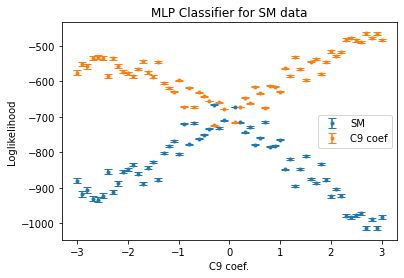

In [38]:
k_inverse_list =[]
mean_0_list =[]
mean_1_list =[]
std_0_list =[]
std_1_list =[]
for k, arr in log_likelihood_models.items():
    k_inverse = le.inverse_transform([k])
    if k_inverse == 0:
        continue
    mean_0 = arr[:, 0].mean()
    mean_1 = arr[:, 1].mean()
    std_0 = arr[:, 0].std()
    std_1 = arr[:, 1].std()

    k_inverse_list.append(k_inverse)
    mean_0_list.append(mean_0)
    mean_1_list.append(mean_1)
    std_0_list.append(std_0)
    std_1_list.append(std_1)

plt.errorbar(k_inverse_list, mean_0_list, marker='.', yerr=std_0_list,c='tab:blue',ls='none', capsize=4,label='SM')
plt.errorbar(k_inverse_list, mean_1_list, marker='.', yerr=std_1_list,c='tab:orange',ls='none', capsize=4,label='C9 coef')
plt.xlabel("C9 coef.")
plt.ylabel("Loglikelihood")
plt.title('MLP Classifier for SM data')
plt.legend()
plt.show()

In [87]:
main_file_min3_3_50[main_file_min3_3_50.c9==3]

,k,l,p,c9
q2,,,,
4.580947,0.562037,1.803697,-0.174775,3.0
4.641361,0.515447,1.579723,-0.253039,3.0
1.710747,2.565443,2.019185,1.730403,3.0
1.946132,0.496776,1.894040,1.430133,3.0
0.861265,0.101990,2.337969,-0.111178,3.0
...,...,...,...,...
2.867084,0.613460,1.764476,0.379792,3.0
1.766788,0.271437,2.507484,1.911673,3.0
1.091659,0.168273,0.864024,-1.190881,3.0


In [88]:
main_file_min3_3_50.c9.unique()

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ])

In [89]:
Y.values


array([[ 0.],
       [-3.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [-3.]])

In [91]:
test_data_00

,k,l,p,c9
q2,,,,
3.873457,0.158958,1.982635,-1.604679,0.0
3.299837,2.555141,1.138187,2.767353,0.0
4.803670,2.920779,1.866995,1.718054,0.0
2.497051,0.255986,2.728457,2.557163,0.0
4.980364,0.599808,1.159502,3.080713,0.0
...,...,...,...,...
4.233746,2.666052,0.898526,-1.051128,0.0
5.405676,2.866997,0.772888,0.300893,0.0
4.497611,1.812525,2.323906,-0.105737,0.0
